# This is the minimum Working Example to compute a multiple scattering experiment in the Q-Phase 

In [1]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
"""
Created on Sat Jun 10 19:53:32 2017

@author: Bene

This file creates a fwd-model for the TESCAN Q-PHASE under 
multiple-scattering. It is majorly derived from  "LEarning approach for optical tomography"
U. S. Kamilov, BIG, EPFL, 2014.
"""
# %load_ext autoreload
import tensorflow as tf
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io
import scipy as scipy

# load own functions
import src.model as mus
import src.tf_helper as tf_helper
import src.tf_generate_object as tf_go
import src.data as data

import src.optimization.tf_regularizers as reg
import os
from datetime import datetime

# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 6))
mpl.rc('image', cmap='gray')


# Define some optimization parameters 

In [2]:
'''Define some stuff related to infrastructure'''
mytimestamp = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')

is_flip = False
is_display = True
is_optimization = True 

'''Define Optimization Parameters'''
my_learningrate = 5e-4  # learning rate
lambda_tv = 1e-3 # lambda for Total variation
lambda_gr = 0 # lambda for Goods Roughness 
lambda_pos = 10
lambda_neg = 10

Niter = 10000
Ndisplay = 10

''' File which stores the experimental parameters from the Q-PHASE setup 
    1.) Read in the parameters of the dataset ''' 
matlab_par_file = './Data/DROPLETS/myParameterNew.mat'   
matlab_pars = data.import_parameters_mat(filename = matlab_par_file, matname='myParameterNew')

''' 2.) Read in the parameters of the dataset ''' 
matlab_val_file = './Data/DROPLETS/allAmp_red.mat'   
matlab_val = data.import_realdata_h5(filename = matlab_val_file, matname='allAmp_red', is_complex=True)
if(is_flip):
    np_meas = np.flip(matlab_val,0)
else:
    np_meas = matlab_val
        
print('do we need to flip the data?! -> Observe FFT!!')

do we need to flip the data?! -> Observe FFT!!


Folder exists already
Assigned some value for dn which is not good!
----------> Be aware: We are taking aberrations into account!
Shifting the illumination in X by: -1 Pixel
Shifting the illumination in Y by: -1 Pixel
Number of Illumination Angles / Plane waves: 49
Buildup Q-PHASE Model 


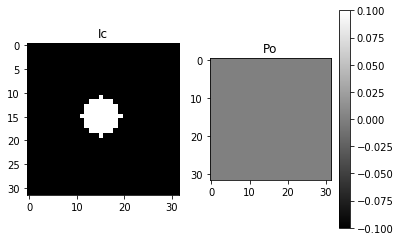

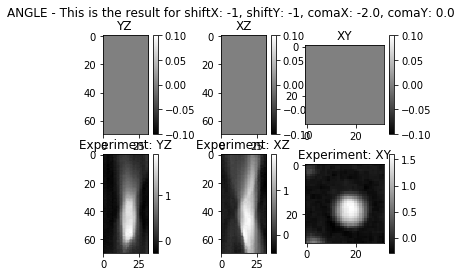

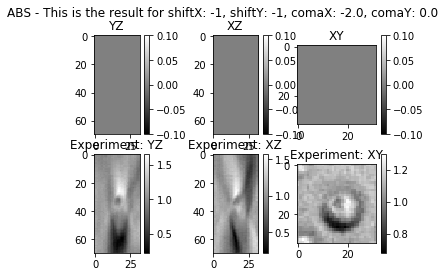

Folder exists already
Assigned some value for dn which is not good!
----------> Be aware: We are taking aberrations into account!
Shifting the illumination in X by: -1 Pixel
Shifting the illumination in Y by: -1 Pixel
Number of Illumination Angles / Plane waves: 49
Buildup Q-PHASE Model 


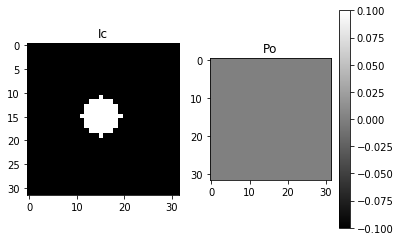

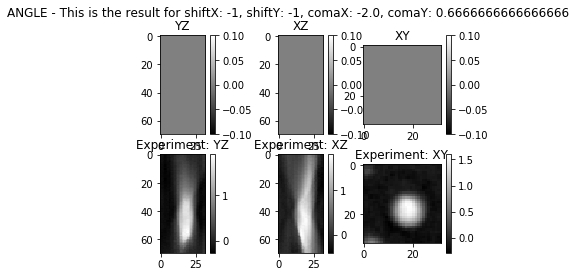

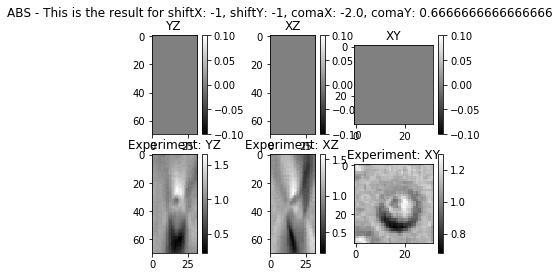

Folder exists already
Assigned some value for dn which is not good!
----------> Be aware: We are taking aberrations into account!
Shifting the illumination in X by: -1 Pixel
Shifting the illumination in Y by: -1 Pixel
Number of Illumination Angles / Plane waves: 49
Buildup Q-PHASE Model 


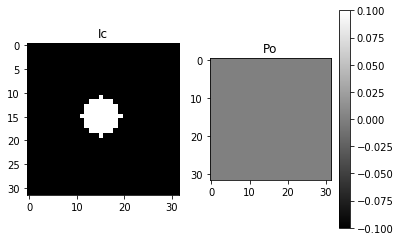

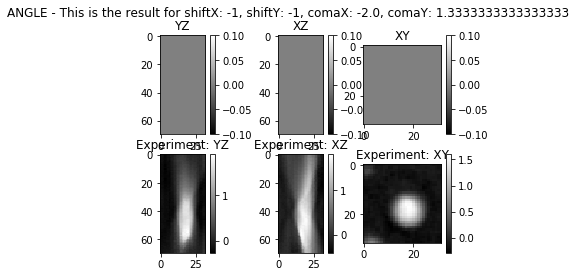

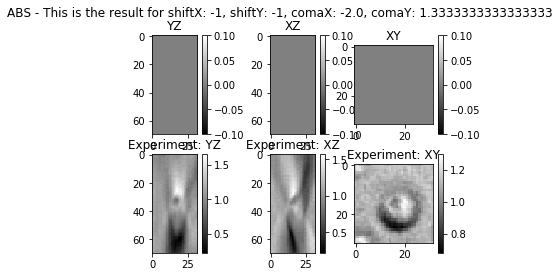

Folder exists already
Assigned some value for dn which is not good!
----------> Be aware: We are taking aberrations into account!
Shifting the illumination in X by: -1 Pixel
Shifting the illumination in Y by: -1 Pixel
Number of Illumination Angles / Plane waves: 49
Buildup Q-PHASE Model 


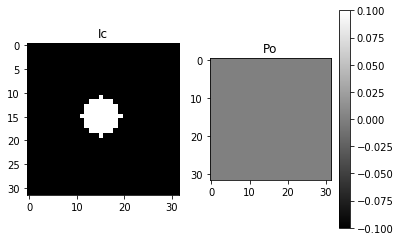

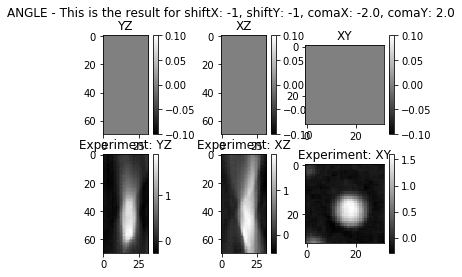

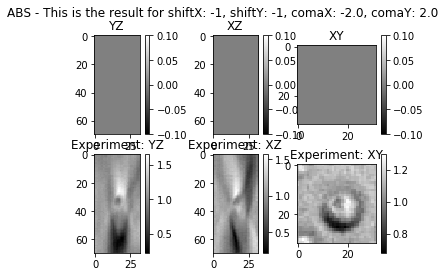

Folder exists already
Assigned some value for dn which is not good!
----------> Be aware: We are taking aberrations into account!
Shifting the illumination in X by: -1 Pixel
Shifting the illumination in Y by: -1 Pixel
Number of Illumination Angles / Plane waves: 49
Buildup Q-PHASE Model 


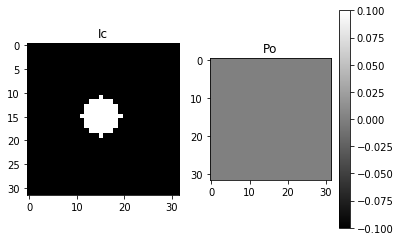

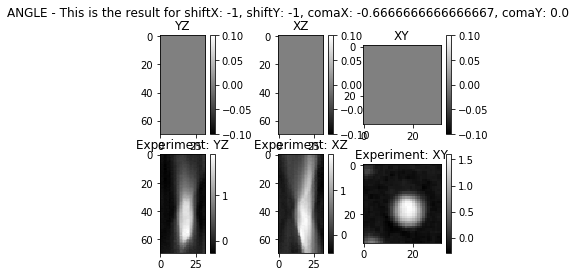

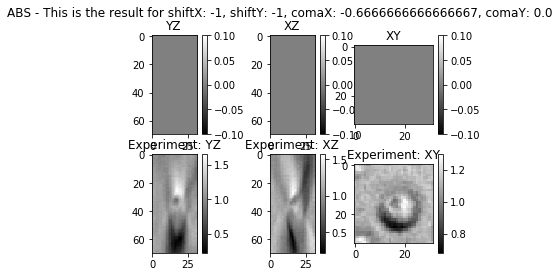

Folder exists already
Assigned some value for dn which is not good!
----------> Be aware: We are taking aberrations into account!
Shifting the illumination in X by: -1 Pixel
Shifting the illumination in Y by: -1 Pixel
Number of Illumination Angles / Plane waves: 49
Buildup Q-PHASE Model 


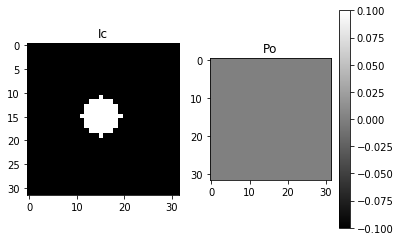

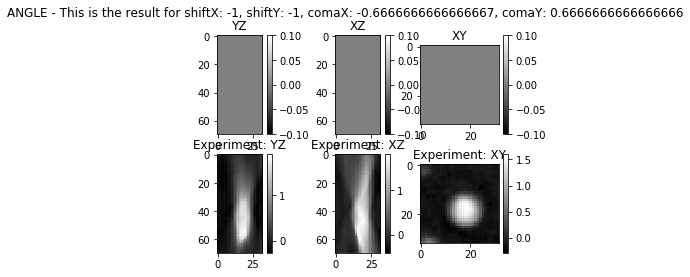

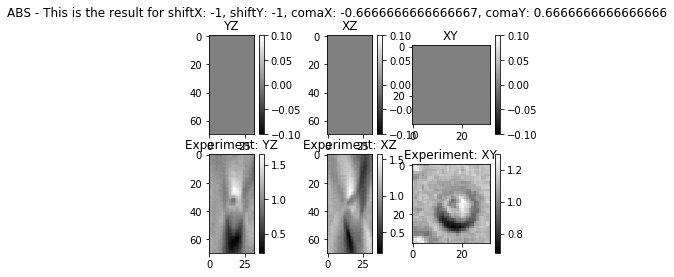

Folder exists already
Assigned some value for dn which is not good!
----------> Be aware: We are taking aberrations into account!
Shifting the illumination in X by: -1 Pixel
Shifting the illumination in Y by: -1 Pixel
Number of Illumination Angles / Plane waves: 49
Buildup Q-PHASE Model 


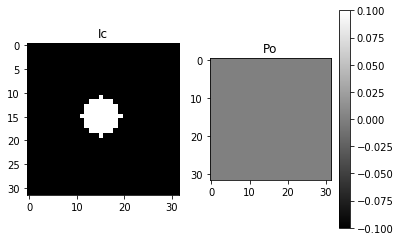

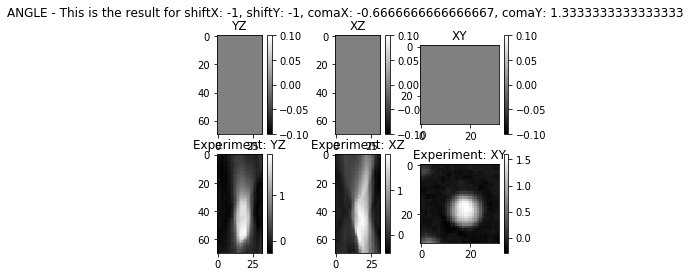

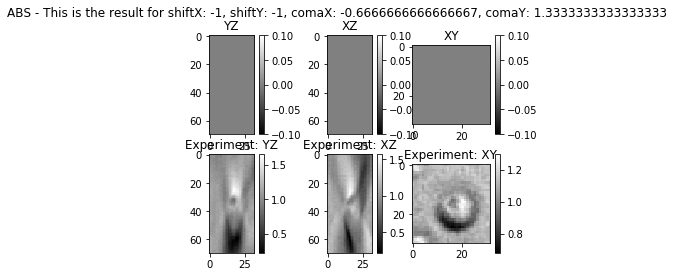

Folder exists already
Assigned some value for dn which is not good!
----------> Be aware: We are taking aberrations into account!
Shifting the illumination in X by: -1 Pixel
Shifting the illumination in Y by: -1 Pixel
Number of Illumination Angles / Plane waves: 49
Buildup Q-PHASE Model 


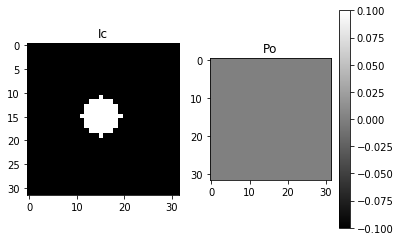

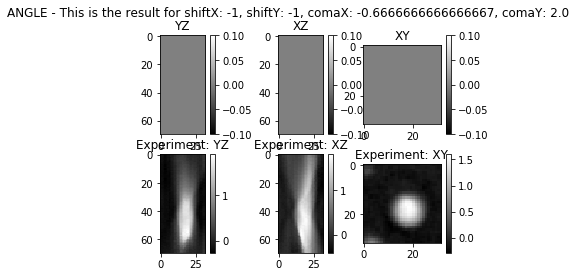

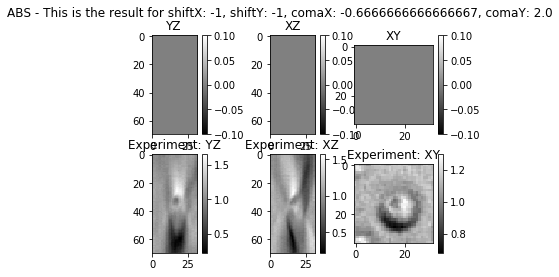

Folder exists already
Assigned some value for dn which is not good!
----------> Be aware: We are taking aberrations into account!
Shifting the illumination in X by: -1 Pixel
Shifting the illumination in Y by: -1 Pixel
Number of Illumination Angles / Plane waves: 49
Buildup Q-PHASE Model 


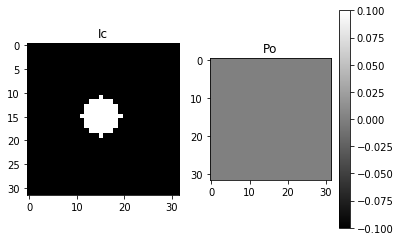

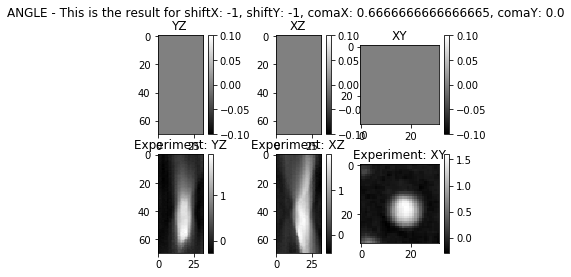

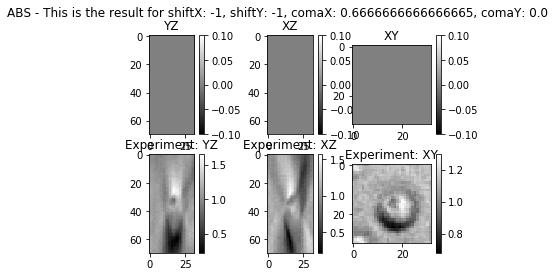

Folder exists already
Assigned some value for dn which is not good!
----------> Be aware: We are taking aberrations into account!
Shifting the illumination in X by: -1 Pixel
Shifting the illumination in Y by: -1 Pixel
Number of Illumination Angles / Plane waves: 49
Buildup Q-PHASE Model 


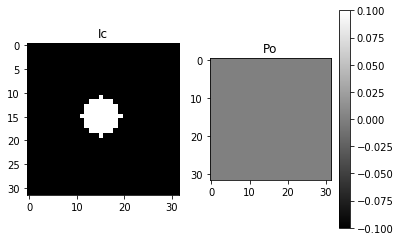

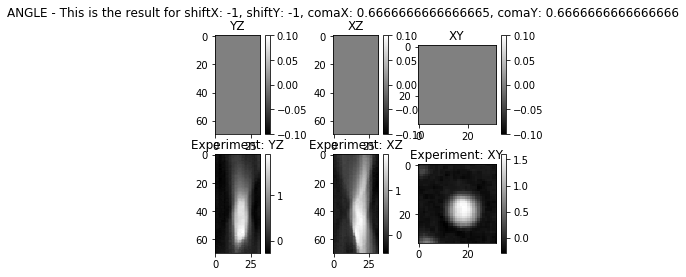

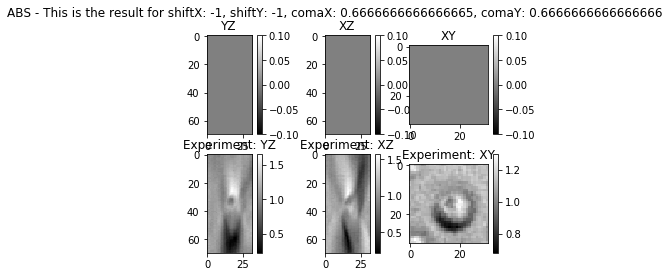

Folder exists already
Assigned some value for dn which is not good!
----------> Be aware: We are taking aberrations into account!
Shifting the illumination in X by: -1 Pixel
Shifting the illumination in Y by: -1 Pixel
Number of Illumination Angles / Plane waves: 49
Buildup Q-PHASE Model 


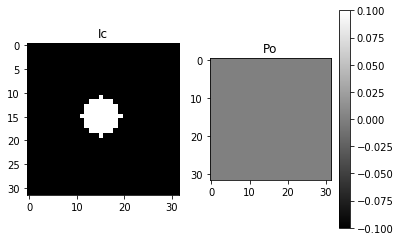

KeyboardInterrupt: 

In [3]:
tf.reset_default_graph()
is_display = True

for shiftIcX in range(-1,2):
    for shiftIcY in range(-1,2):
        for comaX in np.linspace(-2,2,4):
            for comaY in np.linspace(0,2,4): # should be greater than 0
                
                savepath =  os.path.join('./Data/DROPLETS/RESULTS/', 'shiftX_'+str(shiftIcX)+'_shiftY_'+str(shiftIcY)+'_comaX_'+str(comaX)+'_comaY_'+str(comaY))

                # Create directory
                try: 
                    os.mkdir(savepath)
                except(FileExistsError): 
                    print('Folder exists already')


                ''' Create the Model'''
                muscat = mus.MuScatModel(matlab_pars, is_optimization=is_optimization)
                muscat.Nx,muscat.Ny = int(np.squeeze(matlab_pars['Nx'].value)), int(np.squeeze(matlab_pars['Ny'].value))

                # INVERTING THE MISAGLINMENT OF THE SYSTEM! Its consered to be coma and/or shifted optical axis of the illumination in Y-direction!
                muscat.shiftIcX = shiftIcX # shifts pupil along X; >0 -> shifts down (influences YZ-Plot)
                muscat.shiftIcY = shiftIcY # shifts pupil along Y; >0 -> shifts right (influences XZ-Plot)
                muscat.comaX = comaX # introduces Coma in X direction 
                muscat.comaY = -comaY # introduces Coma in X direction 
                muscat.dn = .05
                #muscat.NAc = .3
                muscat.mysize = (muscat.Nz,muscat.Nx,muscat.Ny) # ordering is (Nillu, Nz, Nx, Ny)

                ''' Create a 3D Refractive Index Distributaton as a artificial sample'''
                obj = tf_go.generateObject(mysize=muscat.mysize, obj_dim=muscat.dx, obj_type ='sphere', diameter = 1, dn = muscat.dn)

                ''' Compute the systems model'''
                muscat.computesys(obj, is_zernike=True)

                tf_fwd = muscat.computemodel()# Generate Test-Object

                if(is_display): plt.subplot(121), plt.title('Ic'), plt.imshow(muscat.Ic), plt.subplot(122), plt.title('Po'),plt.imshow(np.fft.fftshift(np.angle(muscat.Po))), plt.colorbar(), plt.show()


                ''' Evaluate the model '''
                sess = tf.Session()
                sess.run(tf.global_variables_initializer())
                myres = sess.run(tf_fwd, feed_dict={muscat.TF_obj:obj})

                # add noise
                myres_noise = myres + 0.00*np.random.randn(muscat.Nz,muscat.Nx,muscat.Ny)

                fig = plt.figure()
                #plt.title('Experiment: YZ'),plt.imshow(obj[:,muscat.mysize[1]//2,:]), plt.colorbar()
                plt.subplot(231)
                plt.title('YZ'),plt.imshow(np.angle(myres_noise)[:,muscat.mysize[1]//2,:]), plt.colorbar()
                plt.subplot(232)
                plt.title('XZ'),plt.imshow(np.angle(myres_noise)[:,:,muscat.mysize[2]//2]), plt.colorbar()
                plt.subplot(233)
                plt.title('XY'),plt.imshow(np.angle(myres_noise)[muscat.mysize[0]//2,:,:]), plt.colorbar()

                plt.subplot(234)
                plt.title('Experiment: YZ'),plt.imshow(np.angle(matlab_val)[:,muscat.mysize[1]//2,:]), plt.colorbar()
                plt.subplot(235)
                plt.title('Experiment: XZ'),plt.imshow(np.angle(matlab_val)[:,:,muscat.mysize[2]//2]), plt.colorbar()
                plt.subplot(236)
                plt.title('Experiment: XY'),plt.imshow(np.angle(matlab_val)[muscat.mysize[0]//2,:,:]), plt.colorbar()
                fig.suptitle('ANGLE - This is the result for shiftX: '+str(shiftIcX)+', shiftY: '+str(shiftIcY)+', comaX: '+str(comaX)+', comaY: '+str(comaY))
                plt.savefig('ANGLE_shiftX_'+str(shiftIcX)+'_shiftY_'+str(shiftIcY)+'_comaX_'+str(comaX)+'_comaY_'+str(comaY)+'_compare_fig.png', bbox_inches='tight')
                plt.show()
                
                
                fig = plt.figure()
                plt.subplot(231)
                plt.title('YZ'),plt.imshow(np.abs(myres_noise)[:,muscat.mysize[1]//2,:]), plt.colorbar()
                plt.subplot(232)
                plt.title('XZ'),plt.imshow(np.abs(myres_noise)[:,:,muscat.mysize[2]//2]), plt.colorbar()
                plt.subplot(233)
                plt.title('XY'),plt.imshow(np.abs(myres_noise)[muscat.mysize[0]//2,:,:]), plt.colorbar()

                plt.subplot(234)
                plt.title('Experiment: YZ'),plt.imshow(np.abs(matlab_val)[:,muscat.mysize[1]//2,:]), plt.colorbar()
                plt.subplot(235)
                plt.title('Experiment: XZ'),plt.imshow(np.abs(matlab_val)[:,:,muscat.mysize[2]//2]), plt.colorbar()
                plt.subplot(236)
                plt.title('Experiment: XY'),plt.imshow(np.abs(matlab_val)[muscat.mysize[0]//2,:,:]), plt.colorbar()
                fig.suptitle('ABS - This is the result for shiftX: '+str(shiftIcX)+', shiftY: '+str(shiftIcY)+', comaX: '+str(comaX)+', comaY: '+str(comaY))
                plt.savefig('ABS_shiftX_'+str(shiftIcX)+'_shiftY_'+str (shiftIcY)+'_comaX_'+str(comaX)+'_comaY_'+str(comaY)+'_compare_fig.png', bbox_inches='tight')
                plt.show()
               
                #data.save_timeseries(np.angle(matlab_val), 'droplet_meas_angle')
                #data.save_timeseries(np.angle(myres), 'droplet_simu_angle') 
                #%% save the results
                np.save(savepath+'/rec.npy', myres)

                tf_helper.saveHDF5(myres, savepath+'/Obj_Reconstruction.h5')
                tf_helper.saveHDF5(np.abs(np_meas), savepath+'/Amplitude_abs.h5')
                tf_helper.saveHDF5(np.angle(np_meas), savepath+'/Amplitude_angle.h5')

In [7]:
import numpy as np
import ipyvolume as ipv
ipv.quickvolshow(np.abs(myres))#, level=[0, 10], opacity=0.03, level_width=0.1, data_min=0, data_max=10)


/anaconda3/lib/python3.6/site-packages/ipyvolume/serialize.py:77: RuntimeWarning: invalid value encountered in true_divide
  grid_normalized = (grid*1.0 - vmin) / (vmax - vmin)
